In [1]:
import os
import random
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

ROOT_DIR = "./data"
RANDOM_SEED = 110

np.random.seed(RANDOM_SEED)
%matplotlib inline

In [2]:
# read csv
df = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
df.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


### NaN

In [3]:
nan_columns = df.columns[df.isnull().any()]
# 대부분 전부 NaN이거나 최소 약 만 천 개 이상 NaN이라서 전부 삭제
df.drop(nan_columns, axis=1, inplace=True) # 464 entries -> 178 entries

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 178 entries, Wip Line_Dam to target
dtypes: float64(72), int64(78), object(28)
memory usage: 55.0+ MB


In [7]:
df.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,114.612,19.9,7,127,1,0
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.600,7.0,185,1,0,0
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,19.8,10,73,1,0
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,19.900,12.0,268,1,0,0
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.700,8.0,121,1,0,0


### Duplicates

In [8]:
CAT = ["Dam", "AutoClave", "Fill1", "Fill2"]

In [9]:
wip_line = [f"Wip Line_{cat}" for cat in CAT]
sum(df.duplicated(subset=wip_line)) # 전부 동일한 행

40505

In [10]:
for cat in CAT:
    print(df[f"Wip Line_{cat}"].unique())

['IVI-OB6']
['IVI-OB6']
['IVI-OB6']
['IVI-OB6']


In [11]:
# 전부 IVI-OB6이므로 삭제
df.drop(wip_line, axis=1, inplace=True) # 178 entries -> 174 entries

In [12]:
for cat in CAT:
    print(cat, df[f"Process Desc._{cat}"].unique())

Dam ['Dam Dispenser']
AutoClave ['Auto Clave Out']
Fill1 ['Fill1 Dispenser']
Fill2 ['Fill2 Dispenser']


In [13]:
for cat in CAT:
    print(cat, df[f"Equipment_{cat}"].unique())

Dam ['Dam dispenser #1' 'Dam dispenser #2']
AutoClave ['Auto Clave Out']
Fill1 ['Fill1 dispenser #1' 'Fill1 dispenser #2']
Fill2 ['Fill2 dispenser #1' 'Fill2 dispenser #2']


In [14]:
process_desc = [f"Process Desc._{cat}" for cat in CAT]
# Equipment가 Process Desc. 역할하고 있으므로 전부 삭제
df.drop(process_desc, axis=1, inplace=True) # 174 entries -> 170 entries

In [15]:
for cat in CAT:
    col = f"Equipment_{cat}"
    if cat == "AutoClave": # AutoClave는 Auto Clave Out으로 전부 같으므로 삭제
        df.drop(col, axis=1, inplace=True) # 170 entries -> 169 entries
    else:
        df[col] = df[col].str.split("#", expand=True)[1] # e.g.Dam dispenser #1 -> 1 / Dam dispenser #2 -> 2

In [16]:
for cat in CAT:
    print(df[f"Model.Suffix_{cat}"].unique())

['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']


In [17]:
model_suffix = [f"Model.Suffix_{cat}" for cat in CAT]
df[~df.duplicated(subset=model_suffix)][model_suffix]

,Model.Suffix_Dam,Model.Suffix_AutoClave,Model.Suffix_Fill1,Model.Suffix_Fill2
0,AJX75334505,AJX75334505,AJX75334505,AJX75334505
2,AJX75334501,AJX75334501,AJX75334501,AJX75334501
17,AJX75334502,AJX75334502,AJX75334502,AJX75334502
24,AJX75334507,AJX75334507,AJX75334507,AJX75334507
141,AJX75334506,AJX75334506,AJX75334506,AJX75334506
301,AJX75334508,AJX75334508,AJX75334508,AJX75334508
605,AJX75334503,AJX75334503,AJX75334503,AJX75334503


In [18]:
df["Model.Suffix"] = df["Model.Suffix_Dam"]
model_suffix = [f"Model.Suffix_{cat}" for cat in CAT]
# 전부 같으므로 통합한 Model.Suffix 열 만들고 다 삭제
df.drop(model_suffix, axis=1, inplace=True) # 169 entries -> 166 entries

In [19]:
df["Model.Suffix"].str[:4].unique()
# 모두 AJX7므로 대카테고리 안만들기로 함

array(['AJX7'], dtype=object)

In [20]:
for cat in CAT:
    print(df[f"Insp. Seq No._{cat}"].unique())

[1]
[1]
[1]
[1]


In [21]:
insp_seq_no = [f"Insp. Seq No._{cat}" for cat in CAT]
# 모두 값이 1로 같으므로 전부 삭제
df.drop(insp_seq_no, axis=1, inplace=True) # 166 entries -> 162 entries

In [22]:
for cat in CAT:
    print(df[f"Insp Judge Code_{cat}"].unique())

['OK']
['OK']
['OK']
['OK']


In [23]:
insp_jude_code = [f"Insp Judge Code_{cat}" for cat in CAT]
# 모두 값이 OK로 같으므로 전부 삭제
df.drop(insp_jude_code, axis=1, inplace=True) # 162 entries -> 158 entries

In [24]:
# Workorder 전부 같으므로 통합한 Workorder 카테고리 만들고 전부 삭제
df["Workorder"] = df["Workorder_Dam"]
work_order = [f"Workorder_{cat}" for cat in CAT]
df.drop(work_order, axis=1, inplace=True) # 158 entries -> 155 entries

In [25]:
df["Workorder"].str.split('-', expand=True)[0].str[:4].unique()

array(['4F1X', '3KPM', '4E1X', '3K1X', '3HPM', '3G1X', '3M1X', '4A1X',
       '3H1X', '3L1X', '3GPM', '3F1X', '4B1X', '4C1X', '3MPX', '3I1X',
       '3J1X', '3JPX', '4CPM', '3LPM', '4BPX', '4BPM', '3HPX', '4CPX',
       '4EPM', '3FPM', '4APX', '3KPX', '3FPX'], dtype=object)

In [26]:
df["Workorder Category"] = df["Workorder"].str.split('-', expand=True)[0].str[:4] # 156 entries

In [27]:
df.rename(columns={"1st Pressure 1st Pressure Unit Time_AutoClave": "1st Pressure Unit Time_AutoClave"}, inplace=True)

In [28]:
# CAT 기준으로 열 그룹화
def get_columns_group(df):
    grouped_columns = {}
    for col in df.columns:
        key = col.split('_')[-1]
        if key not in grouped_columns:
            grouped_columns[key] = []
        grouped_columns[key].append(col)
    
    return grouped_columns

### AutoClave

In [29]:
grouped_columns = get_columns_group(df)

In [30]:
df_auto = df[grouped_columns["AutoClave"]]
df_auto.head()

,1st Pressure Collect Result_AutoClave,1st Pressure Unit Time_AutoClave,1st Pressure Judge Value_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,2nd Pressure Judge Value_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,3rd Pressure Judge Value_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Chamber Temp. Judge Value_AutoClave
0,0.312,240,OK,0.493,1,OK,0.499,120,OK,54,361,OK
1,0.311,241,OK,0.311,121,OK,0.498,121,OK,54,483,OK
2,0.315,241,OK,0.490,1,OK,0.498,121,OK,56,363,OK
3,0.299,241,OK,0.300,121,OK,0.500,121,OK,54,483,OK
4,0.302,240,OK,0.302,120,OK,0.498,120,OK,47,480,NG


In [31]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   1st Pressure Collect Result_AutoClave   40506 non-null  float64
 1   1st Pressure Unit Time_AutoClave        40506 non-null  int64  
 2   1st Pressure Judge Value_AutoClave      40506 non-null  object 
 3   2nd Pressure Collect Result_AutoClave   40506 non-null  float64
 4   2nd Pressure Unit Time_AutoClave        40506 non-null  int64  
 5   2nd Pressure Judge Value_AutoClave      40506 non-null  object 
 6   3rd Pressure Collect Result_AutoClave   40506 non-null  float64
 7   3rd Pressure Unit Time_AutoClave        40506 non-null  int64  
 8   3rd Pressure Judge Value_AutoClave      40506 non-null  object 
 9   Chamber Temp. Collect Result_AutoClave  40506 non-null  int64  
 10  Chamber Temp. Unit Time_AutoClave       40506 non-null  in

In [32]:
df_auto.describe()

,1st Pressure Collect Result_AutoClave,1st Pressure Unit Time_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave
count,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000
mean,0.307124,244.949119,0.396764,56.932035,0.501117,122.104059,51.691725,423.985212
std,0.005369,21.475360,0.096129,56.123765,0.025190,8.775836,2.878083,61.066771
min,0.290000,0.000000,0.297000,0.000000,0.305000,1.000000,32.000000,3.000000
25%,0.302000,241.000000,0.309000,1.000000,0.498000,120.000000,49.000000,363.000000
50%,0.308000,241.000000,0.316000,60.000000,0.499000,121.000000,52.000000,452.000000
75%,0.312000,241.000000,0.491000,121.000000,0.500000,121.000000,54.000000,483.000000
max,0.319000,300.000000,0.900000,181.000000,0.914000,301.000000,59.000000,540.000000


In [33]:
df["1st Pressure Judge Value_AutoClave"].unique()

array(['OK'], dtype=object)

In [34]:
df["2nd Pressure Judge Value_AutoClave"].unique()

array(['OK'], dtype=object)

In [35]:
df["3rd Pressure Judge Value_AutoClave"].unique()

array(['OK'], dtype=object)

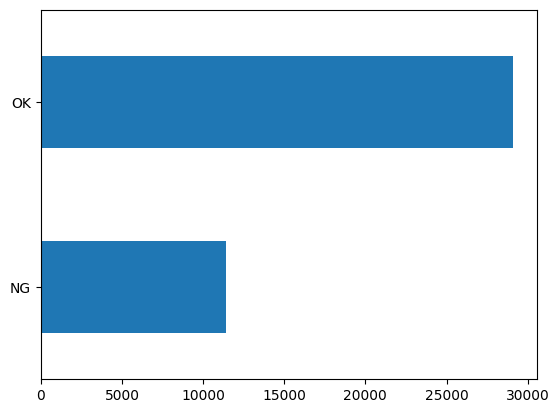

In [36]:
df["Chamber Temp. Judge Value_AutoClave"].value_counts().sort_values().plot(kind="barh");

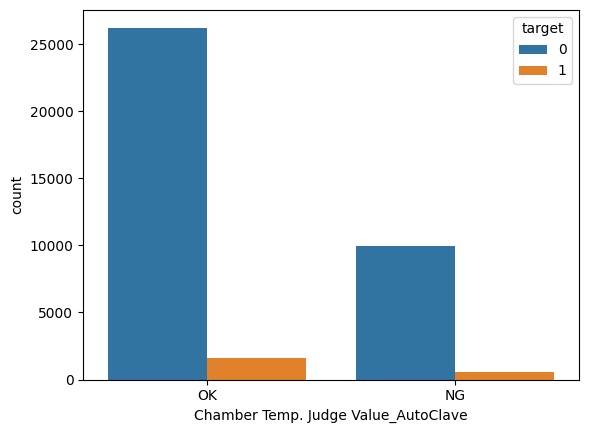

In [54]:
sns.countplot(x="Chamber Temp. Judge Value_AutoClave", hue="target", data=df);

In [37]:
# 모두 Ok 값이므로 삭제
df.drop(["1st Pressure Judge Value_AutoClave",
         "2nd Pressure Judge Value_AutoClave",
         "3rd Pressure Judge Value_AutoClave"], axis=1, inplace=True) # 153 entries

In [38]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit_transform(df["Chamber Temp. Judge Value_AutoClave"])

# # Ok (1) NG (0)
# df["Chamber Temp. Judge Value_AutoClave"] = le.fit_transform(df["Chamber Temp. Judge Value_AutoClave"])

In [39]:
pressure_unit_time = df[["1st Pressure Unit Time_AutoClave", 
                         "2nd Pressure Unit Time_AutoClave",
                         "3rd Pressure Unit Time_AutoClave",]]

df["Mean Pressure Unit Time_AutoClave"] = pressure_unit_time.apply("mean", axis=1).astype('int64')

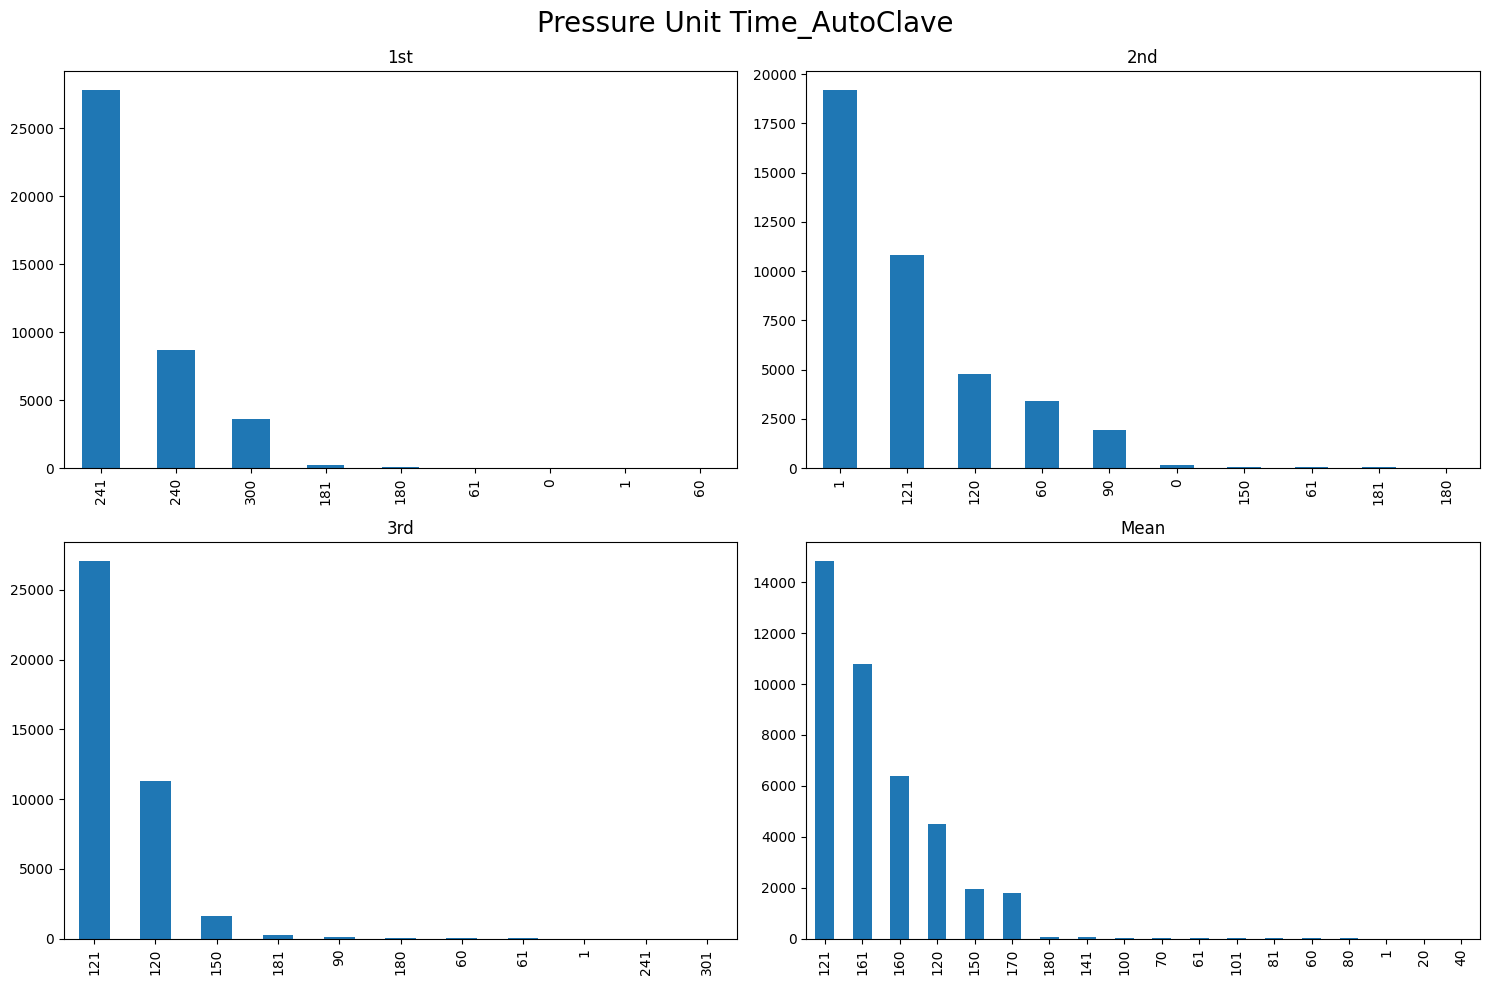

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df["1st Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[0, 0], title="1st");
df["2nd Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[0, 1], title="2nd");
df["3rd Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[1, 0], title="3rd");
df["Mean Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[1, 1], title="Mean");
fig.suptitle("Pressure Unit Time_AutoClave", size=20)
plt.tight_layout();

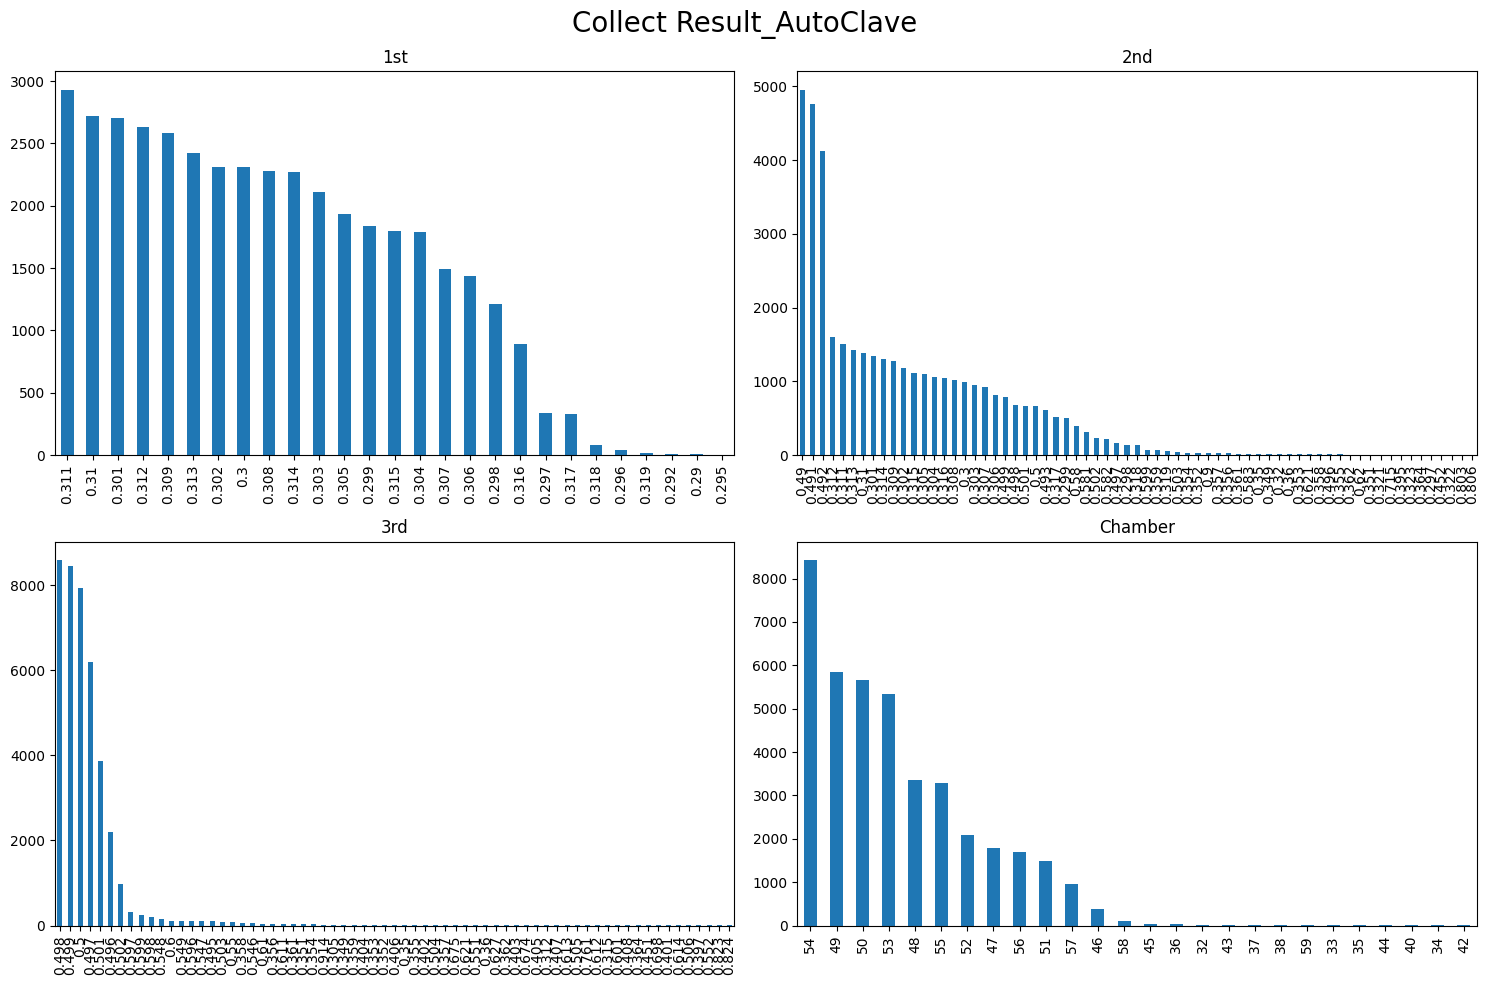

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df["1st Pressure Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[0, 0], title="1st");
df["2nd Pressure Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[0, 1], title="2nd");
df["3rd Pressure Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[1, 0], title="3rd");
df["Chamber Temp. Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[1, 1], title="Chamber");
fig.suptitle("Collect Result_AutoClave", size=20)
plt.tight_layout();

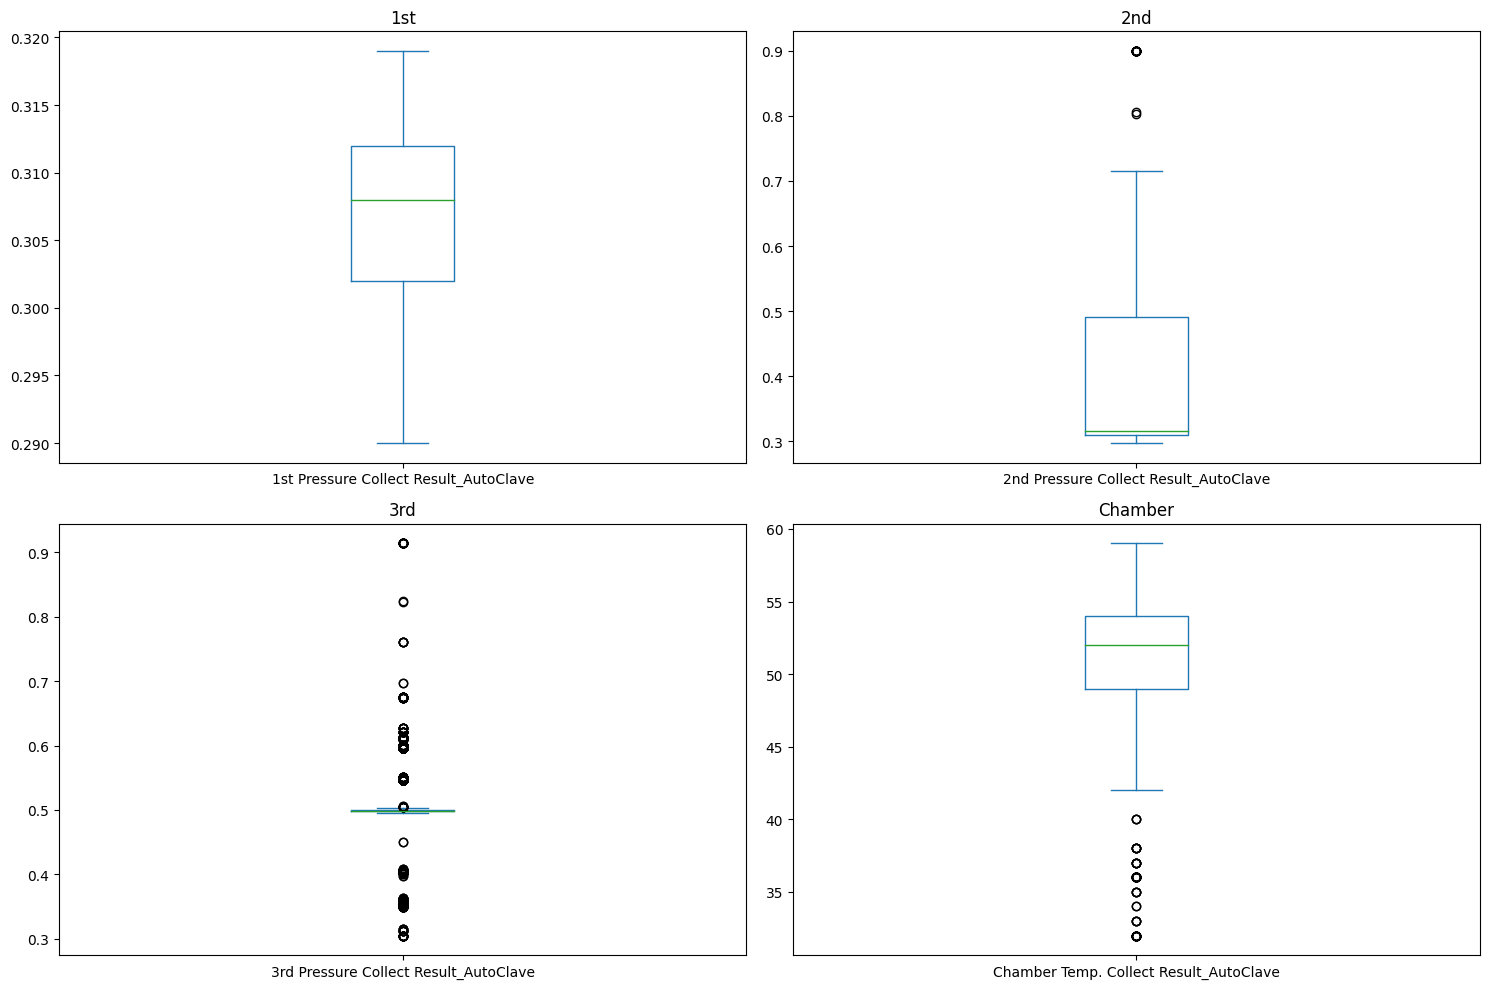

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df["1st Pressure Collect Result_AutoClave"].plot.box(ax=axes[0, 0], title="1st");
df["2nd Pressure Collect Result_AutoClave"].plot.box(ax=axes[0, 1], title="2nd");
df["3rd Pressure Collect Result_AutoClave"].plot.box(ax=axes[1, 0], title="3rd");
df["Chamber Temp. Collect Result_AutoClave"].plot.box(ax=axes[1, 1], title="Chamber");
plt.tight_layout();

In [43]:
Q1 = df['3rd Pressure Collect Result_AutoClave'].quantile(0.25)
Q3 = df['3rd Pressure Collect Result_AutoClave'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Q3: {Q3}") # 2098개

Q1: 0.498
Q3: 0.5


In [44]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['3rd Pressure Collect Result_AutoClave'] >= lower_bound) & (df['3rd Pressure Collect Result_AutoClave'] <= upper_bound)]

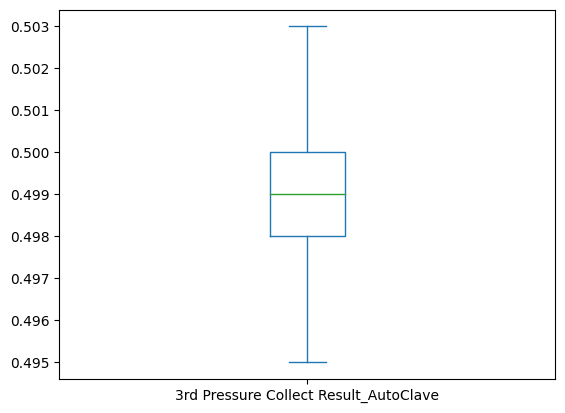

In [45]:
df["3rd Pressure Collect Result_AutoClave"].plot.box();

In [46]:
pressure_collect_result = df[["1st Pressure Collect Result_AutoClave", 
                              "2nd Pressure Collect Result_AutoClave",
                              "3rd Pressure Collect Result_AutoClave",]]

df["Mean Pressure Collect Result_AutoClave"] = pressure_collect_result.apply("mean", axis=1).round(3)

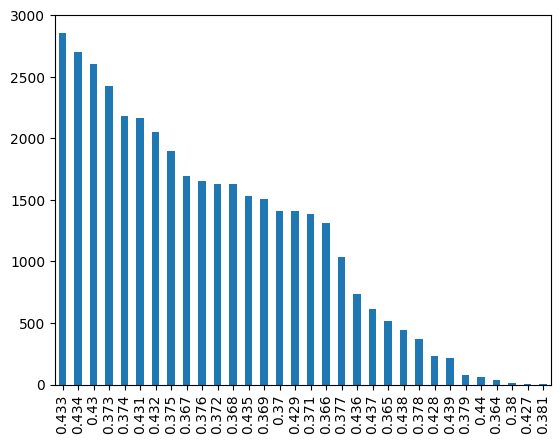

In [47]:
df["Mean Pressure Collect Result_AutoClave"].value_counts().plot.bar();

In [ ]:
# df["target"].unique()

In [ ]:
# # 우리가 파악해야하는 건 AbNormal이므로 1로 설정
# df["target"] = df["target"].map({"Normal": 0, "AbNormal": 1})

In [ ]:
# # save csv
# df.to_csv(os.path.join(ROOT_DIR, "pre_1.csv"), index=False)

## Dam

In [71]:
grouped_columns = get_columns_group(df)

In [72]:
df_dam = df[grouped_columns["Dam"]]
df_dam.head(3).T

,0,1,2
Equipment_Dam,1,1,2
CURE END POSITION X Collect Result_Dam,240.0,240.0,1000.0
CURE END POSITION Z Collect Result_Dam,2.5,2.5,12.5
CURE END POSITION Θ Collect Result_Dam,-90,-90,90
CURE SPEED Collect Result_Dam,100,70,85
...,...,...,...
Stage3 Line4 Distance Speed Collect Result_Dam,5800,4000,5800
THICKNESS 1 Collect Result_Dam,5800,0,5800
THICKNESS 2 Collect Result_Dam,0.0,0.0,0.012
THICKNESS 3 Collect Result_Dam,0.0,0.0,-0.022


In [73]:
df_dam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38408 entries, 0 to 40505
Data columns (total 70 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Equipment_Dam                                             38408 non-null  object 
 1   CURE END POSITION X Collect Result_Dam                    38408 non-null  float64
 2   CURE END POSITION Z Collect Result_Dam                    38408 non-null  float64
 3   CURE END POSITION Θ Collect Result_Dam                    38408 non-null  int64  
 4   CURE SPEED Collect Result_Dam                             38408 non-null  int64  
 5   CURE STANDBY POSITION X Collect Result_Dam                38408 non-null  int64  
 6   CURE STANDBY POSITION Z Collect Result_Dam                38408 non-null  float64
 7   CURE STANDBY POSITION Θ Collect Result_Dam                38408 non-null  int64  
 8   CURE START POSIT

In [75]:
df_dam.describe()

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam
count,38408.000000,38408.000000,38408.000000,38408.000000,38408.0,38408.0,38408.0,38408.000000,38408.0,38408.000000,...,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000
mean,529.590710,6.310404,-21.412727,73.993569,1150.0,33.5,0.0,744.219694,33.5,-21.412727,...,6434.219433,6434.219433,6428.855968,6432.201625,6428.855968,6431.029994,3368.582066,-0.000941,-0.004812,2.931988
std,369.093087,4.856488,87.416784,9.947818,0.0,0.0,0.0,364.236600,0.0,87.416784,...,1710.773675,1710.773675,1705.849155,1710.989759,1705.849155,1711.114122,2956.596737,0.007038,0.020640,3.459015
min,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,-90.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0.000000,-0.054000,-0.219000,-0.118000
25%,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,-90.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,0.000000,0.000000,0.000000,0.000000
50%,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,-90.000000,...,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,4000.000000,0.000000,0.000000,0.000000
75%,1000.000000,12.500000,90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,90.000000,...,9000.000000,9000.000000,7000.000000,9000.000000,7000.000000,9000.000000,6500.000000,0.000000,0.000000,7.000000
max,1000.000000,12.500000,90.000000,105.000000,1150.0,33.5,0.0,1030.000000,33.5,90.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,6500.000000,0.037000,0.007000,7.000000


In [ ]:
df["Dispense Volume(Stage1) Collect Result_Dam"].plot.hist()

In [ ]:
df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].plot.hist()

In [ ]:
tmp = df[["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam", "DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam", "DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam"]]

In [ ]:
tmp.values.tolist()

In [ ]:
tmp = df['CURE START POSITION X Collect Result_Dam'] - df['CURE END POSITION X Collect Result_Dam']
tmp = pd.DataFrame(tmp)

In [ ]:
tmp.value_counts()

In [ ]:
ttmp = tmp.apply(func="mean", axis=1)
ttmp = pd.DataFrame(ttmp)

In [ ]:
ttmp.plot.hist()

In [ ]:
df[["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam", "target"]].groupby("target").count()

In [ ]:
df["DISCHARGED SPEED OF RESIN Collect Result_Dam"].value_counts()

In [ ]:
df[["DISCHARGED SPEED OF RESIN Collect Result_Dam", "target"]].groupby("target").value_counts()
# 10은 0.066로 abnormal (1406/21046)
# 16은 0.048로 abnormal (943/19456)
# 15은 0.25로 abnormal (1/4) (전체가 4개밖에 없어서 비율이 높은 듯)

In [ ]:
df["CURE START POSITION Θ Collect Result_Dam"].equals(df["CURE END POSITION Θ Collect Result_Dam"])

In [ ]:
df["CURE SPEED Collect Result_Dam"].plot.hist();

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

In [ ]:
df["CURE SPEED Collect Result_Dam"].values.reshape(-1, 1)

In [ ]:
t = kbd.fit_transform(df["CURE SPEED Collect Result_Dam"].values.reshape(-1, 1))

In [ ]:
t

In [ ]:
kbd.bin_edges_

In [ ]:
df["CURE END POSITION X Collect Result_Dam"].plot.hist()